# Step 1: Importing Necessary Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import plotly.express as px

# Step 2: Loading and Reading dataset:

In [6]:
df = pd.read_csv("C:\\Users\\lordo\\DATASETS FOR EDA\\laptop_prices.csv")

#### Reading the first five rows:

In [10]:
df.head()

Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageType  SecondaryStorageType  \
0            128                 0                SSD                    No   
1            128                 0      Flash Storage                    No   
2            256                 0                SSD                    No   
3            512                 0                SSD                    No   
4            256                 0                SSD                    No   

   GPU_company               GPU_model  
0        Intel  Iris Plus Graphics 640  
1        Intel        HD Graphics 6000  
2        Intel         HD Graphics 620  
3          AMD          Radeon Pro 455  
4        Intel  Iris Plus Graphics 650  

[5 rows x 23 columns]

# 2. Data Shape: (Number of Rows and columns):

In [14]:
x = df.shape
print("Number of Rows:",x[0])
print("Number of Columns:",x[1])

Number of Rows: 1275
Number of Columns: 23


# 3. Columns Overview 

In [18]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

## Columns Overview:

| **Column Name**          | **Description**                                                        |
| ------------------------ | ---------------------------------------------------------------------- |
| **Company**              | Brand or manufacturer of the laptop (e.g., Dell, HP, Apple)            |
| **Product**              | Specific model name or identifier of the laptop                        |
| **TypeName**             | Type of laptop (e.g., Ultrabook, Notebook, Gaming)                     |
| **Inches**               | Screen size in inches                                                  |
| **Ram**                  | Amount of RAM in GB                                                    |
| **OS**                   | Operating System installed (e.g., Windows, macOS, Linux)               |
| **Weight**               | Weight of the laptop (in kg)                                           |
| **Price\_euros**         | Price of the laptop in Euros                                           |
| **Screen**               | Description of screen resolution and technology (e.g., Full HD IPS)    |
| **ScreenW**              | Screen width in pixels                                                 |
| **ScreenH**              | Screen height in pixels                                                |
| **Touchscreen**          | Indicates if the laptop has a touchscreen (Yes/No or True/False)       |
| **IPSpanel**             | Indicates if the screen uses IPS panel technology                      |
| **RetinaDisplay**        | Indicates if the laptop has a Retina Display (typically Apple devices) |
| **CPU\_company**         | Manufacturer of the processor (e.g., Intel, AMD)                       |
| **CPU\_freq**            | Processor base frequency in GHz                                        |
| **CPU\_model**           | Specific model of the CPU (e.g., i5-8250U)                             |
| **PrimaryStorage**       | Size of the primary storage (in GB)                                    |
| **SecondaryStorage**     | Size of the secondary storage (in GB), if available                    |
| **PrimaryStorageType**   | Type of primary storage (e.g., HDD, SSD)                               |
| **SecondaryStorageType** | Type of secondary storage (e.g., HDD, SSD)                             |
| **GPU\_company**         | Manufacturer of the graphics unit (e.g., NVIDIA, Intel)                |
| **GPU\_model**           | Specific model of the GPU                                              |


# 4. Data Cleaning:

In [25]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

## The dataset has no null values:

# 5. Columns datatypes:

In [30]:
df.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

#### 2. Changing datatypes of columns: (from object to category which have few uniques values in dataset):

In [33]:
df = df.astype({
    'TypeName': 'category',
    'OS': 'category',
    'CPU_company': 'category',
    'PrimaryStorageType': 'category',
    'SecondaryStorageType': 'category',
    'GPU_company': 'category'})

#### 3.Changing datatypes of columns: (from object to boolean for only two values: 1 for yes and 0 for no)

In [36]:
df = df.astype({
'Touchscreen': 'bool',
    'IPSpanel': 'bool',
    'RetinaDisplay': 'bool'})

#### 4. Conversion of int and float datatypes:

In [39]:
df = df.astype({
    'Inches': 'float32',
    'Weight': 'float32',
    'Price_euros': 'float32',
    'CPU_freq': 'float32',
    'Ram': 'int32',
    'ScreenW': 'int16',
    'ScreenH': 'int16',
    'PrimaryStorage': 'int32',
    'SecondaryStorage': 'int32'})

In [42]:
df.dtypes

Company                   object
Product                   object
TypeName                category
Inches                   float32
Ram                        int32
OS                      category
Weight                   float32
Price_euros              float32
Screen                    object
ScreenW                    int16
ScreenH                    int16
Touchscreen                 bool
IPSpanel                    bool
RetinaDisplay               bool
CPU_company             category
CPU_freq                 float32
CPU_model                 object
PrimaryStorage             int32
SecondaryStorage           int32
PrimaryStorageType      category
SecondaryStorageType    category
GPU_company             category
GPU_model                 object
dtype: object

## The Datatypes got changed:

# 6. Removing Duplicates:

In [47]:
df.drop_duplicates()

Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

      Ram          OS  Weight  Price_euros    Screen  ScreenW  ...  \
0       8       macOS    1.37  1339.689941  Standard     2560  ...   
1       8       macOS    1.34   898.940002  Standard     1440  ...   
2       8       No OS    1.86   575.000000   Full HD     1920  ...   
3      16       macOS    1.83  2537.449951  Standard     2880  ...   
4       8       macOS    1.37  1803.599976  Standard     2560  ...   
...   ...         ...     ...          ...       ...      ...  ...   
1270    4  Windows 10    1.80   638.000000   Full HD     1920  ...   
1271   16  Windows 10    1.30  1499.000000  Quad HD+     3200  ...   
1272    2  Windows 10    1.50   229.000000  Standard     1366  ...   
1273    6  Windows 10    2.19   764.000000  Standard     1366  ...   
1274    4  Windows 10    2.20   369.000000  Standard     1366  ...   

      RetinaDisplay  CPU_company  CPU_freq                CPU_model  \
0              True        Intel       2.3                  Core i5   
1              True        Intel       1.8                  Core i5   
2              True        Intel       2.5            Core i5 7200U   
3              True        Intel       2.7                  Core i7   
4              True        Intel       3.1                  Core i5   
...             ...          ...       ...                      ...   
1270           True        Intel       2.5            Core i7 6500U   
1271           True        Intel       2.5            Core i7 6500U   
1272           True        Intel       1.6  Celeron Dual Core N3050   
1273           True        Intel       2.5            Core i7 6500U   
1274           True        Intel       1.6  Celeron Dual Core N3050   

     PrimaryStorage  SecondaryStorage PrimaryStorageType  \
0               128                 0                SSD   
1               128                 0      Flash Storage   
2               256                 0                SSD   
3               512                 0                SSD   
4               256                 0                SSD   
...             ...               ...                ...   
1270            128                 0                SSD   
1271            512                 0                SSD   
1272             64                 0      Flash Storage   
1273           1024                 0                HDD   
1274            500                 0                HDD   

      SecondaryStorageType  GPU_company               GPU_model  
0                       No        Intel  Iris Plus Graphics 640  
1                       No        Intel        HD Graphics 6000  
2                       No        Intel         HD Graphics 620  
3                       No          AMD          Radeon Pro 455  
4                       No        Intel  Iris Plus Graphics 650  
...                    ...          ...                     ...  
1270                    No        Intel         HD Graphics 520  
1271                    No        Intel         HD Graphics 520  
1272                   

## There are no duplicate rows and columns in the dataset:

# 7. Understanding Data:

### 1.df.info() for quick summary of the dataset:


In [54]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Company               1275 non-null   object  
 1   Product               1275 non-null   object  
 2   TypeName              1275 non-null   category
 3   Inches                1275 non-null   float32 
 4   Ram                   1275 non-null   int32   
 5   OS                    1275 non-null   category
 6   Weight                1275 non-null   float32 
 7   Price_euros           1275 non-null   float32 
 8   Screen                1275 non-null   object  
 9   ScreenW               1275 non-null   int16   
 10  ScreenH               1275 non-null   int16   
 11  Touchscreen           1275 non-null   bool    
 12  IPSpanel              1275 non-null   bool    
 13  RetinaDisplay         1275 non-null   bool    
 14  CPU_company           1275 non-null   category
 15  CPU_

### 2.df.describe() for statistics summary:

In [58]:
df.describe()

Inches          Ram       Weight  Price_euros      ScreenW  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean     15.022902     8.440784     2.040525  1134.968994  1900.043922   
std       1.429472     5.097809     0.669196   700.752441   493.346186   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1920.000000   
50%      15.600000     8.000000     2.040000   989.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1496.500000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1275.000000  1275.000000     1275.000000       1275.000000  
mean   1073.904314     2.302980      444.517647        176.069020  
std     283.883940     0.503846      365.537726        415.960655  
min     768.000000     0.900000        8.000000          0.000000  
25%    1080.000000     2.000000      256.000000          0.000000  
50%    1080.000000     2.500000      256.000000          0.000000  
75%    1080.000000     2.700000      512.000000          0.000000  
max    2160.000000     3.600000     2048.000000       2048.000000

# Exploratory Data Analysis:

In [62]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

# Sahil Kumar:

## 1.Top 10 most selling laptop company brands:

In [66]:
top_10_laptop_brand = df['Company'].value_counts().reset_index(name='Count')
top_10_laptop_brand = top_10_laptop_brand.sort_values(by = 'Count',ascending = False).head(10)
top_10_laptop_brand

Company  Count
0       Dell    291
1     Lenovo    289
2         HP    268
3       Asus    152
4       Acer    101
5        MSI     54
6    Toshiba     48
7      Apple     21
8    Samsung      9
10  Mediacom      7

### Visualisation:

####  BARPLOT:

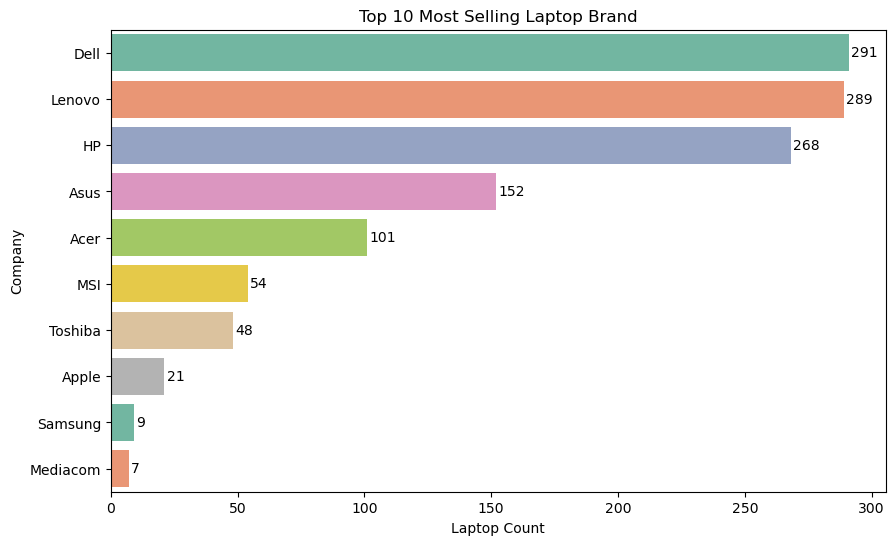

In [69]:
plt.figure(figsize = (10,6))
ax = sns.barplot(data = top_10_laptop_brand, y='Company' , x='Count', hue='Company', palette = 'Set2')

plt.title("Top 10 Most Selling Laptop Brand")
plt.xlabel("Laptop Count")
plt.ylabel("Company")

for p in ax.patches:
    ax.text( p.get_width() + 1, p.get_y() + p.get_height() / 2,int(p.get_width()),
    ha='left', va='center', fontsize=10)
    
plt.show()

### . INSIGHT:

 Dell leads the market with 291 units sold closely followed by Lenovo with 289 units and Hp also maintains a strong presence with 268 units:

 This data indicates thet dell , lenovo and hp domoinates the market potentially due to the brand reputation , product availabilty and consumer

 preferences

##  2.Most selling product per company:

In [75]:
product_counts = df.groupby(['Company','Product'],observed=True).size().reset_index(name='count')
most_selling = product_counts.sort_values('count',ascending=False).drop_duplicates('Company')
most_selling


Company                       Product  count
249       Dell                        XPS 13     30
304         HP                        250 G6     21
429     Lenovo            Legion Y520-15IKBN     19
596    Toshiba                 Satellite Pro     13
2         Acer                      Aspire 3     12
57       Apple                   MacBook Pro     10
572  Microsoft                Surface Laptop      6
577    Samsung                    Notebook 9      6
124       Asus                     Rog Strix      6
573      Razer                     Blade Pro      5
619     Xiaomi                   Mi Notebook      4
254     Google               Pixelbook (Core      3
523        MSI                   GE72MVR 7RG      2
570   Mediacom                SmartBook Edge      2
377     Huawei                    MateBook X      2
618       Vero  V142 (X5-Z8350/2GB/32GB/W10)      1
251    Fujitsu                 LifeBook A556      1
188      Chuwi                  Lapbook 15,6      1
378         LG                   Gram 14Z970      1

### Visualisation:

####  Horizantal Barchart:

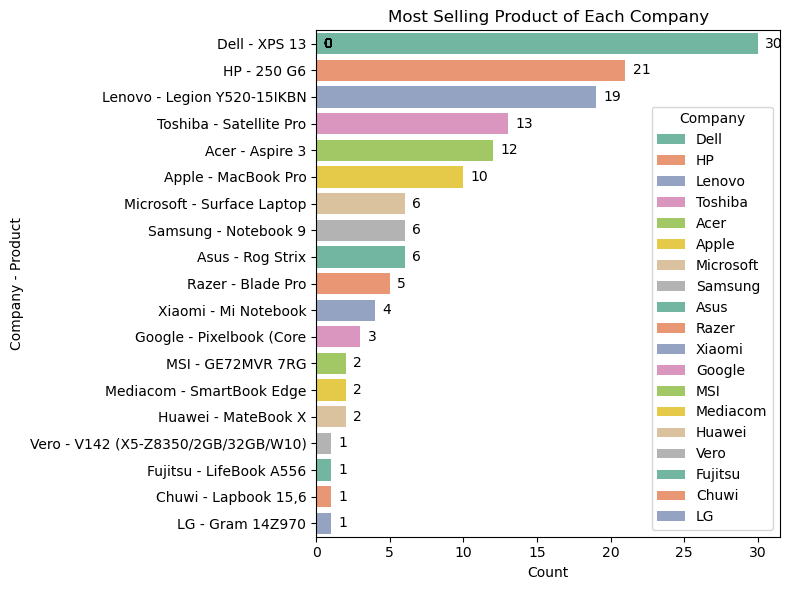

In [78]:
# Step 1: Create a combined label (company + product ):
most_selling['Label'] = most_selling['Company'] + ' - ' + most_selling['Product']

# Step 2: Ploting:
plt.figure(figsize = (8,6))
ax = sns.barplot(data=most_selling, y='Label', x='count',hue='Company', palette='Set2')

# Step 3: Add count labels
for p in ax.patches:
    ax.text(p.get_width() + 0.5,p.get_y() + p.get_height() / 2,int(p.get_width()),va='center', ha='left', fontsize=10)

plt.title('Most Selling Product of Each Company')
plt.xlabel('Count')
plt.ylabel('Company - Product')
plt.tight_layout()
plt.show()

###  INSIGHT:

THE CHART REPRESENT THE MOST SELLING LAPTOP PRODUCT FROM EACH COMPANY:

 DELL XPS 13 IS THE MOST SELLING PRODUCT FOLLOWED BY HP 250 G6 , LENOVO'S LEGION Y520-15IKBN AND TOSHIBA'S SATELLITE PRO ALSO HAVE NOTABLE SALES,

 WITH 19 AND 13 UNITS RESPECTIVELY.


### Reason why these products are top selling:

 1. Premium Build Quality.
  2. Top-Tier Display.
  3. Performance vs Portability Balance.
  4. Battery Life.
  5. Brand Trust and Support.
  6. Consistent Positive Reviews.
  7. Appeals to Target Users.
  8. Smart Product Refreshes.

## 3.Most selling type name per company:

In [82]:
df['TypeName'].value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

In [83]:
typename_count = df.groupby(['Company','TypeName'],observed=False).size().reset_index(name='Count')
most_selling_typename = typename_count.sort_values('Count',ascending = False).drop_duplicates('Company')
most_selling_typename     

Company   TypeName  Count
45          HP   Notebook    180
63      Lenovo   Notebook    174
27        Dell   Notebook    159
3         Acer   Notebook     76
15        Asus   Notebook     63
67         MSI     Gaming     54
99     Toshiba   Notebook     36
10       Apple  Ultrabook     21
75    Mediacom   Notebook      6
82   Microsoft  Ultrabook      6
85       Razer     Gaming      5
94     Samsung  Ultrabook      5
105       Vero   Notebook      4
33     Fujitsu   Notebook      3
58          LG  Ultrabook      3
40      Google  Ultrabook      3
21       Chuwi   Notebook      3
112     Xiaomi  Ultrabook      2
52      Huawei  Ultrabook      2

### Visualisation :

#### Vertical Bargraph:

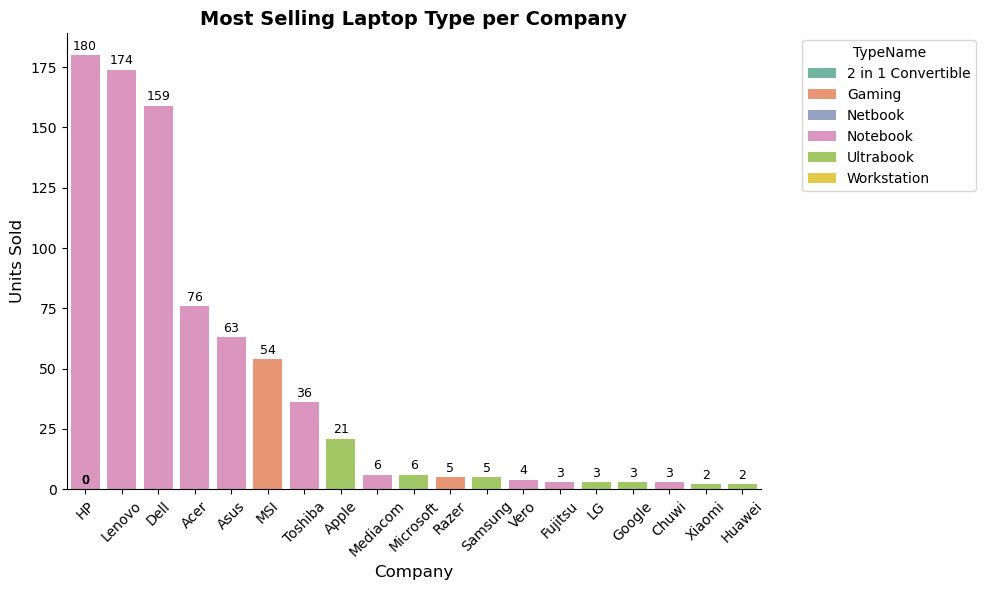

In [87]:
# Step 1 : Plotting:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=most_selling_typename, x='Company', y='Count', hue='TypeName', dodge=False, palette='Set2')

# Step 2: Adding Labels:
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom', fontsize=9)

# Step 3 : Adding title 
plt.title("Most Selling Laptop Type per Company", fontsize=14, fontweight='bold')
plt.xlabel("Company", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='TypeName', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: Displaying Plot:
sns.despine()
plt.tight_layout()
plt.show()

### Insight:

 1. Most selling laptop typename among laptop is Notebook , followed by Ultrabook and Gaming:

 2.Notebook dominant laptop company : hp, lenovo ,dell

 3.Ultrabook dominant laptop company : Apple

 4.Gaming Dominant latop company: MSI.


### -- Reason by Notebooks typename is most sold:--

1. Notebooks are the most sold laptop type because they offer the best balance of price, performance, and portability. 
2. Unlike specialized types (like gaming or ultrabooks), notebooks are versatile, widely available, and ideal for everyday tasks,
3. and come in many configurations at affordable price making them the top choice in both personal and institutional sales.

# 4.Average Price of Laptops per Company:

In [94]:
x = df.groupby('Company')['Price_euros'].mean().reset_index(name='Average_Price')
average_price_of_laptop_per_company = x.sort_values(by='Average_Price',ascending = False)
average_price_of_laptop_per_company

Company  Average_Price
14      Razer    3346.142822
9          LG    2099.000000
11        MSI    1728.908081
6      Google    1677.666626
13  Microsoft    1612.308228
1       Apple    1564.198608
8      Huawei    1424.000000
15    Samsung    1413.444458
16    Toshiba    1267.812500
4        Dell    1199.225098
18     Xiaomi    1133.462524
2        Asus    1123.829712
10     Lenovo    1093.862183
7          HP    1080.314697
5     Fujitsu     729.000000
0        Acer     633.464478
3       Chuwi     314.296661
12   Mediacom     295.000000
17       Vero     217.425003

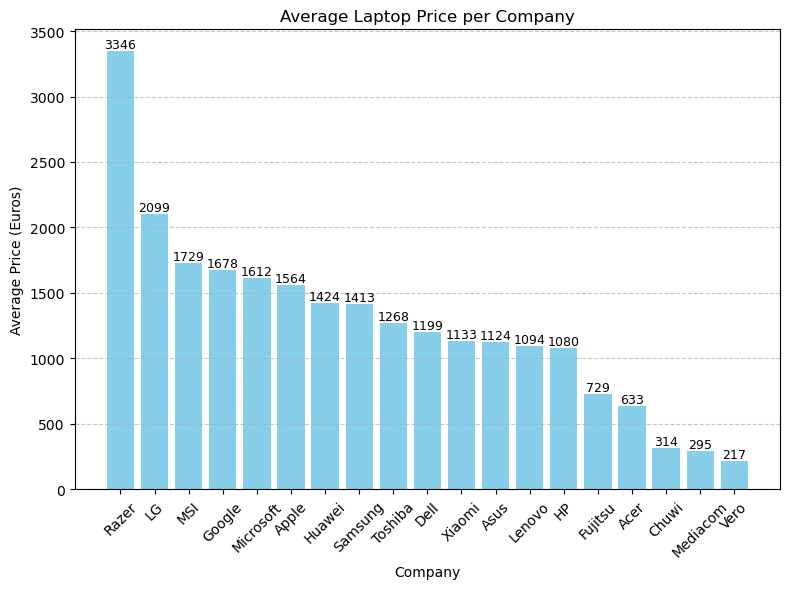

In [96]:
# Plot
plt.figure(figsize=(8,6))
bars = plt.bar(average_price_of_laptop_per_company['Company'],
               average_price_of_laptop_per_company['Average_Price'],
               color='skyblue')

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             f'{height:.0f}',
             ha='center',
             va='bottom',
             fontsize=9)

# Titles and labels
plt.title('Average Laptop Price per Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4.Top 10 most expensive products :

In [101]:
most_expensive_product = df.groupby(['Company','Product'])['Price_euros'].max().reset_index(name='Price')
top_10_most_expensive_product = most_expensive_product.sort_values(by='Price',ascending=False).head(10)
top_10_most_expensive_product

Company             Product        Price
573   Razer           Blade Pro  6099.000000
461  Lenovo        Thinkpad P51  4899.000000
376      HP            Zbook 17  4389.000000
96     Asus          ROG G701VO  3975.000000
373      HP            ZBook 17  3949.399902
97     Asus   ROG G703VI-E5062T  3890.000000
190    Dell        Alienware 17  3659.399902
462  Lenovo       Thinkpad P51s  3299.000000
419  Lenovo  IdeaPad Y900-17ISK  3240.000000
321      HP     Elitebook Folio  3100.000000

### Visualisation:

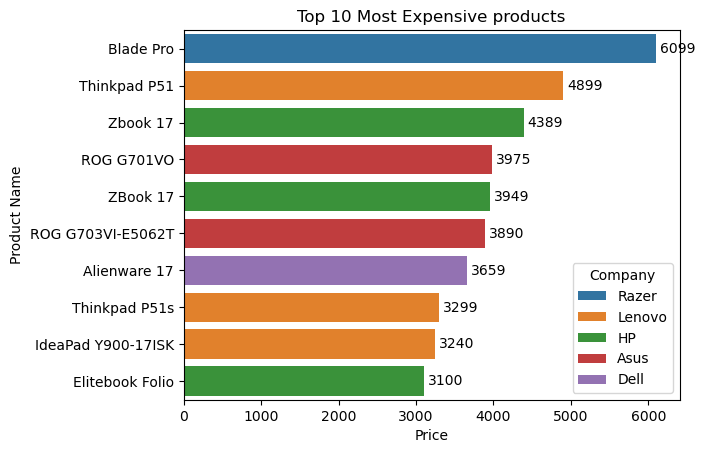

In [104]:
# Step 1 : Plotting:
ax=sns.barplot(data=top_10_most_expensive_product , y='Product', x='Price' , hue='Company')

# Step 2: Adding Labels:
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Step 3 : Adding Title 
plt.title("Top 10 Most Expensive products")
plt.ylabel("Product Name")
plt.xlabel("Price")

# Step 4: Display
plt.show()

In [105]:
# Insight:

# The most expensive laptop is  Razer Blade Pro , followed by Lenovo Thinkpad P51 and Hp Zbook 17.

# Reason why Razer Blade is most expensive:

# 1.i7/i9 or Ryzen 9 processor

# 2.RTX 3070/3080 GPU

# 3.32GB RAM, 1TB SSD

# 4. 17.3" 4K/QHD display

# 5.Aluminum body, RGB keyboard

# 6.Advanced cooling, Thunderbolt 4

# 5.TOP 10_Least expensive product:

In [111]:
least_expensive_product = df.groupby(['Company','Product'])['Price_euros'].min().reset_index(name='Price')
top_10_least_expensive_product = least_expensive_product.sort_values(by='Price',ascending=True).head(10)
top_10_least_expensive_product

Company                               Product       Price
25     Acer      C740-C9QX (3205U/2GB/32GB/Chrome  174.000000
140    Asus                       Vivobook E200HA  191.899994
617    Vero      V131 (X5-Z8350/4GB/32GB/FHD/W10)  196.000000
63     Asus  E402WA-GA010T (E2-6110/2GB/32GB/W10)  199.000000
32     Acer                  Chromebook C910-C2ST  199.000000
615    Vero             K146 (N3350/4GB/32GB/W10)  202.899994
29     Acer                         Chromebook 15  209.000000
367      HP                      Stream 11-Y000na  209.000000
618    Vero          V142 (X5-Z8350/2GB/32GB/W10)  210.800003
59     Asus  A541NA-GO342 (N3350/4GB/500GB/Linux)  224.000000

### Visualisation:

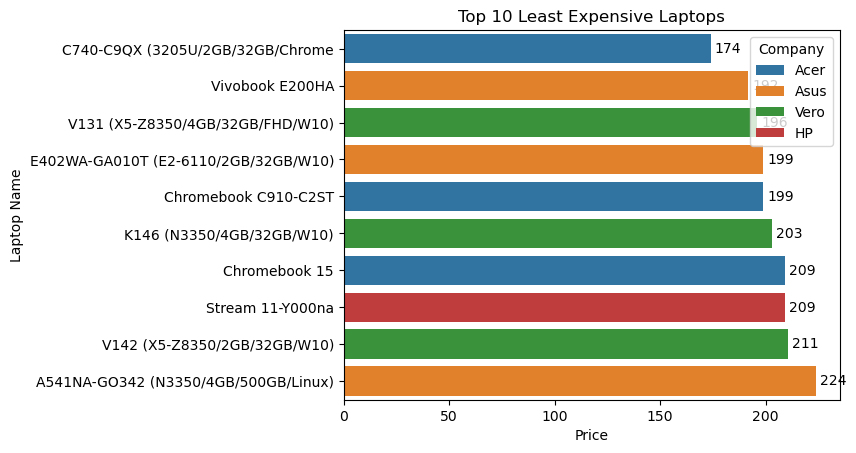

In [114]:
# Step 1 : Plotting:
ax = sns.barplot(data = top_10_least_expensive_product , x = 'Price' , y='Product' , hue ='Company')

# Step 2 : Adding lables:
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Step 3: Adding title 
plt.title("Top 10 Least Expensive Laptops")
plt.ylabel("Laptop Name")
plt.xlabel("Price")

# Step 4: Display plot:
plt.show()

### 6 Most expensive product from each company:

In [117]:
# Step 1: Group by company and find the index of max_price_product for each:
most_expensive_product_per_company = df.loc[df.groupby('Company')['Price_euros'].idxmax()].sort_values(by='Price_euros',ascending=False)

# Step 2: Displaying required columns:
most_expensive_product_per_company[['Company','Product','Price_euros']]

Company                        Product  Price_euros
196       Razer                      Blade Pro  6099.000000
610      Lenovo                   Thinkpad P51  4899.000000
749          HP                       Zbook 17  4389.000000
1066       Asus                     ROG G701VO  3975.000000
723        Dell                   Alienware 17  3659.399902
17        Apple                    MacBook Pro  2858.000000
491     Toshiba              Portege X30-D-10L  2799.000000
177         MSI                GT80S 6QF-074US  2799.000000
1189       Acer                Predator G9-793  2599.000000
449   Microsoft                 Surface Laptop  2589.000000
678          LG                    Gram 15Z975  2299.000000
437      Google                Pixelbook (Core  2199.000000
874     Samsung                     Notebook 9  1849.000000
214      Huawei                     MateBook X  1499.000000
514      Xiaomi                    Mi Notebook  1399.949951
623     Fujitsu                  LifeBook A557   799.000000
421       Chuwi                   LapBook 12.3   449.000000
580    Mediacom                 SmartBook Edge   389.000000
191        Vero  K147 (N3350/4GB/32GB/FHD/W10)   260.000000

### Visualisation:

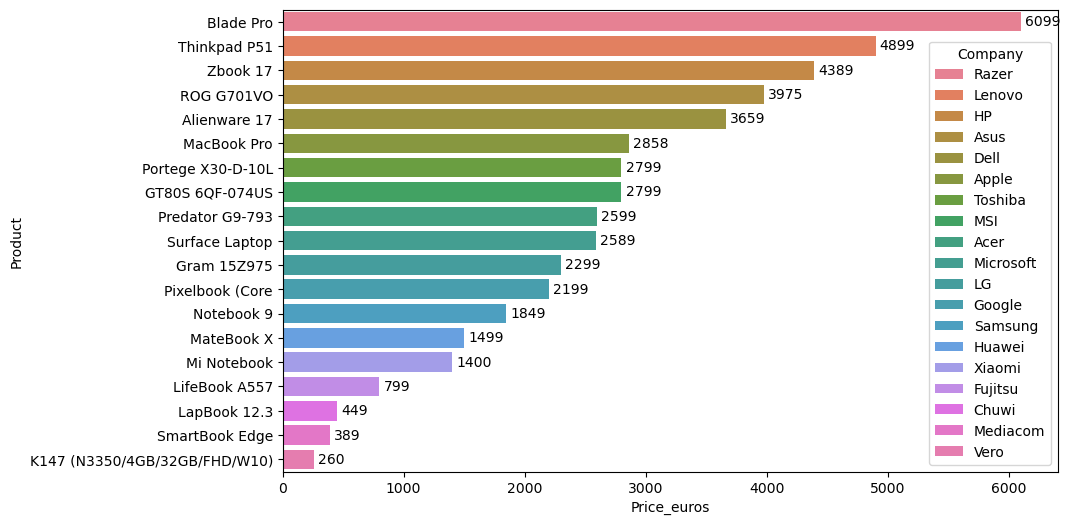

In [121]:
# Step 1 : Plotting:
plt.figure(figsize=(10,6))
ax= sns.barplot(data = most_expensive_product_per_company , x = 'Price_euros' , y='Product' , hue='Company')

# Step 2 : Labeling:
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Step 3 : Display graph
plt.show()

# 7. Least expensive product per company:

In [124]:
least_expensive_product_per_company = df.loc[df.groupby('Company')['Price_euros'].idxmin()]

least_expensive_product_per_company = least_expensive_product_per_company.sort_values(by='Price_euros',ascending=True)

least_expensive_product_per_company[['Company', 'Product', 'Price_euros']]


Company                           Product  Price_euros
1215       Acer  C740-C9QX (3205U/2GB/32GB/Chrome   174.000000
20         Asus                   Vivobook E200HA   191.899994
1120       Vero  V131 (X5-Z8350/4GB/32GB/FHD/W10)   196.000000
1268         HP                  Stream 11-Y000na   209.000000
1272     Lenovo                IdeaPad 100S-14IBR   229.000000
626    Mediacom                     SmartBook 140   239.000000
30        Chuwi                     LapBook 15.6"   244.990005
430     Samsung                      Chromebook 3   269.000000
340        Dell                     Inspiron 3552   274.899994
159     Toshiba                     Satellite Pro   447.000000
983     Fujitsu                     LifeBook A556   649.000000
1169        MSI                          PL60 7RD   839.000000
1         Apple                       Macbook Air   898.940002
877      Xiaomi                       Mi Notebook   935.000000
457   Microsoft                    Surface Laptop   989.000000
1117      Razer                     Blade Stealth  1029.000000
472      Google                   Pixelbook (Core  1275.000000
170      Huawei                        MateBook X  1349.000000
909          LG                       Gram 14Z970  1899.000000

### Visulaisation:

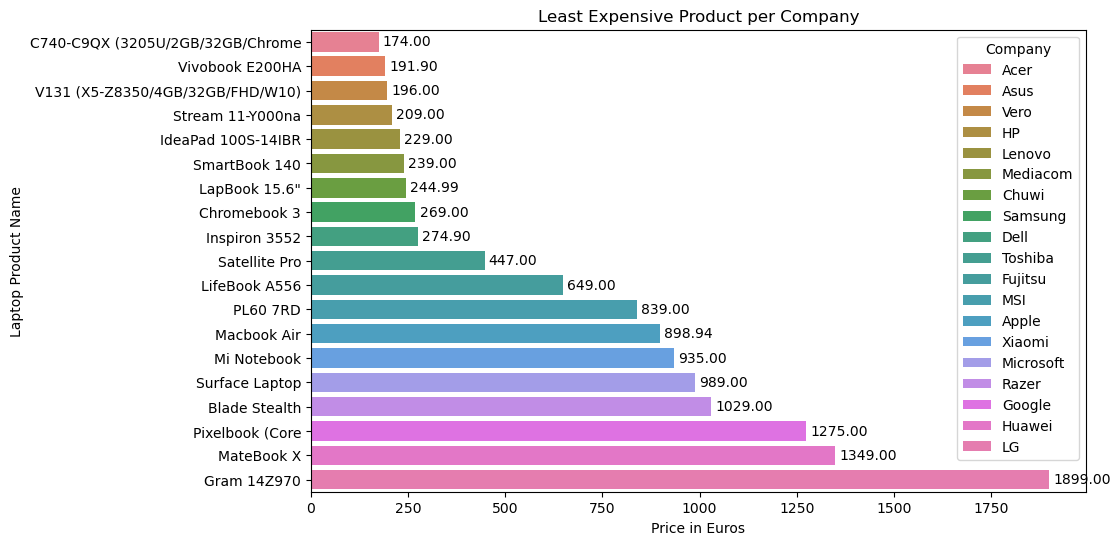

In [126]:
# Step1: Plotting:
plt.figure(figsize=(10,6))
ax=sns.barplot(data= least_expensive_product_per_company, x ='Price_euros' , y='Product',hue='Company')

# Adding Label
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Adding Title
plt.title('Least Expensive Product per Company')
plt.xlabel('Price in Euros')
plt.ylabel('Laptop Product Name')

# Display:
plt.show()

# 8. Top 5 companies by Total Laptop Revenue

In [132]:
x  = df.groupby('Company')['Price_euros'].sum().reset_index(name ='Revenue')

revenue_per_company1 = x.sort_values(by='Revenue',ascending = False).head()

revenue_per_company1

Company        Revenue
4     Dell  348974.500000
10  Lenovo  316126.187500
7       HP  289524.343750
2     Asus  170822.125000
11     MSI   93361.039062

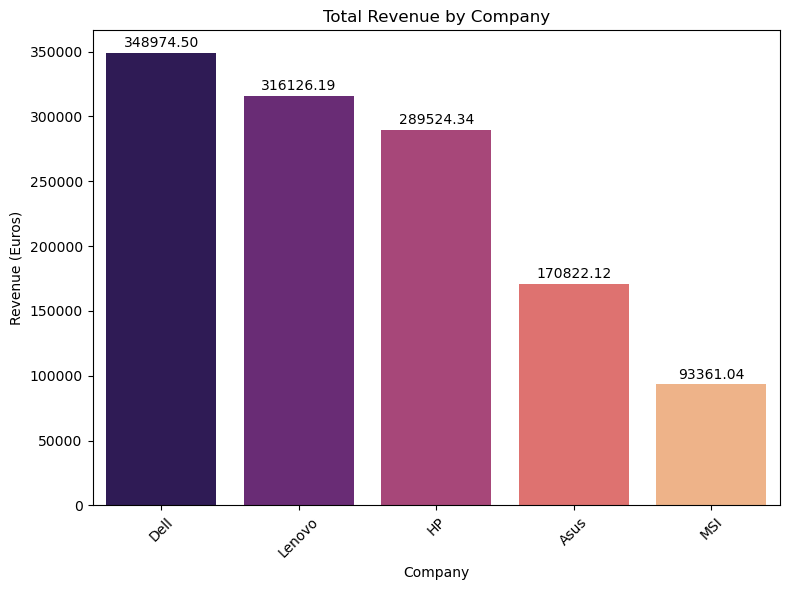

In [133]:
# Step 1 : Plotting:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=revenue_per_company1, x='Company', y='Revenue',hue='Company', palette='magma')

# Step 2 : Adding Labels:
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# Step 3 : Adding title:
plt.title('Total Revenue by Company')
plt.xlabel('Company')
plt.ylabel('Revenue (Euros)')

plt.xticks(rotation=45)
plt.tight_layout()

# Step 4 : Display plot:
plt.show()


In [134]:
# Insight:

# Dell has the highest revenue, approximately ‚Ç¨349,974.50,
# Lenovo follows closely with around ‚Ç¨316,126.19, 
# And HP is in third place with approximately ‚Ç¨289,524.34.

# 9. Companies with highest share of products sold in each Price_Category:

In [140]:
# 1. Creating a Price Category Column:

# The laptop price ranges from $174 to &6099.

# Criteria:

# If price < 1000 then "low" 
# If price < 2500 then "mid"
# If prices >= 2500 then "high"

In [143]:
df['Price_Category'] = df['Price_euros'].apply(lambda x: 'Low' if x < 1000 else ('Mid' if x < 2500 else 'High'))

In [147]:
# Step 2: Finding out the product count by grouping Company and Price_Category

grouped = df.groupby(['Company', 'Price_Category'], observed=True).size().reset_index(name='Product_Count')

grouped = grouped.sort_values(by=['Price_Category', 'Product_Count'], ascending=[True, False])


# Step 3: Ranking the companies based on Product_Count within each Price_Category

grouped['Rank'] = grouped.groupby('Price_Category')['Product_Count'].rank(method='dense', ascending=False)


# Step 4: Selecting top 3 companies from each price category

top_3_company = grouped[grouped['Rank'] <= 3]

top_3_company


Company Price_Category  Product_Count  Rank
10    Dell           High             20   1.0
20  Lenovo           High             12   2.0
6     Asus           High              5   3.0
15      HP           High              5   3.0
30   Razer           High              5   3.0
21  Lenovo            Low            163   1.0
11    Dell            Low            148   2.0
16      HP            Low            138   3.0
17      HP            Mid            125   1.0
12    Dell            Mid            123   2.0
22  Lenovo            Mid            114   3.0

### Visualisation:

C:\Users\lordo\AppData\Local\Temp\ipykernel_17064\338749951.py:3: UserWarning: The palette list has more values (20) than needed (5), which may not be intended.
  sns.barplot(data=top_3_company, x='Price_Category', y='Product_Count', hue='Company',palette=palette)


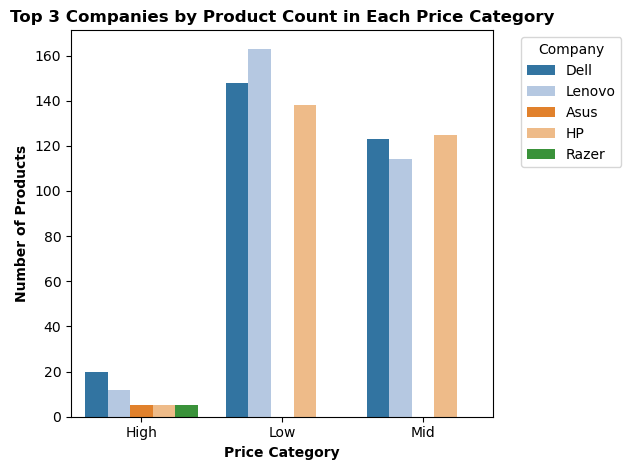

In [150]:
palette = sns.color_palette("tab20")

sns.barplot(data=top_3_company, x='Price_Category', y='Product_Count', hue='Company',palette=palette)

plt.title('Top 3 Companies by Product Count in Each Price Category',fontweight='bold')
plt.ylabel('Number of Products',fontweight='bold')
plt.xlabel('Price Category',fontweight='bold')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [152]:
# Insight:

# Dell has the highest number of product count in High price category:

# lenovo has the highest number of product count in Low price Category:

# HP has the highest number of product count in Mid price Category:

# 10 . Average Price of Laptops for each CPU frequency Range:

In [158]:
# Step 1 : Creating a new column CPU_freq_range:

# The range of CPU_freq lies between 0 and 4:

# Firstly we will define bins and labels for it:

In [160]:
bins = [0,1,2,3,4]

labels = ['0‚Äì1 GHz', '1‚Äì2 GHz', '2‚Äì3 GHz', '3‚Äì4 GHz']

df['CPU_freq_range'] = pd.cut(df['CPU_freq'], bins = bins , labels = labels , right=False)


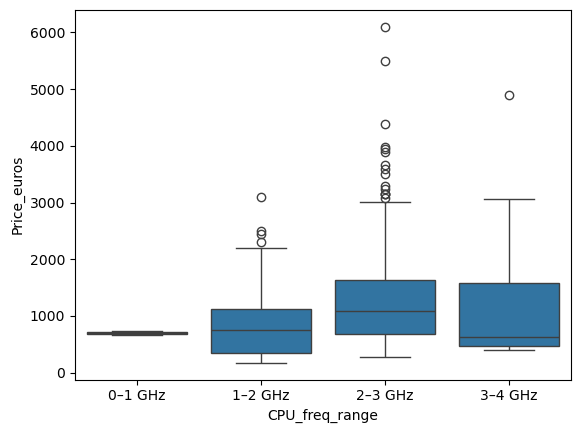

In [162]:
# box plot:

sns.boxplot(data=df , x='CPU_freq_range' , y='Price_euros')
plt.show()


In [164]:
# Step 2: median_price_per_cpu_freq_range:

median_price_per_cpu_freq_range = df.groupby('CPU_freq_range' , observed=False) ['Price_euros'].mean().reset_index(name='mean')

median_price_per_cpu_freq_range = median_price_per_cpu_freq_range.sort_values(by='mean',ascending = False)

median_price_per_cpu_freq_range

CPU_freq_range         mean
2        2‚Äì3 GHz  1237.887817
3        3‚Äì4 GHz  1103.752197
1        1‚Äì2 GHz   819.384827
0        0‚Äì1 GHz   699.000000

### VISUALISATION:

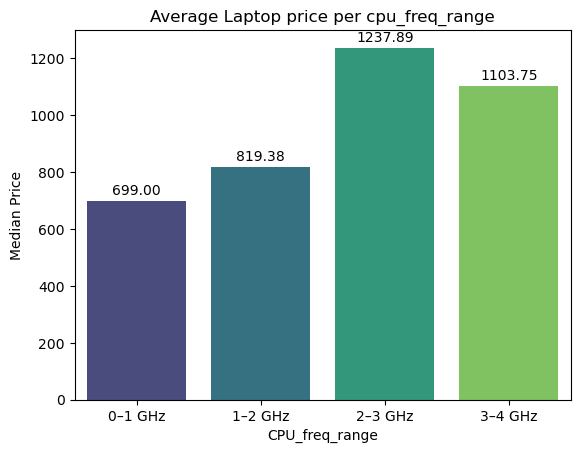

In [167]:
ax = sns.barplot(data =median_price_per_cpu_freq_range, x='CPU_freq_range' , y='mean', hue= 'CPU_freq_range',palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

plt.title("Average Laptop price per cpu_freq_range")
plt.ylabel("Median Price")
plt.xlabel("CPU_freq_range")
plt.show()

In [169]:
# Insight:

# Laptop with the cpu_freq_range between 2-3 GHz have the highest average price.

# Followed by 1-2GHz cpu_freq_range then 0-1GHz cpu_freq_range and at last 3-4GHZ.

# 

# CONTRADICTION:

# Laptops with the highest_cpu_freq_range should have the highest prices , but cpu_freq is not the single factor which decides the price of laptop:

# There are also other factor by which price of laptop is heavily affected:

# 11 . Median Price by Laptop Weight Category:

In [174]:
# Step 1 : Create a Weight Class:

bins = [0, 1.5 , 2.5 , 5 ]

labels = ['Light' , 'Medium' , 'Heavy' ]

df['Weight_Class'] = pd.cut(df['Weight'] , bins=bins , labels = labels)


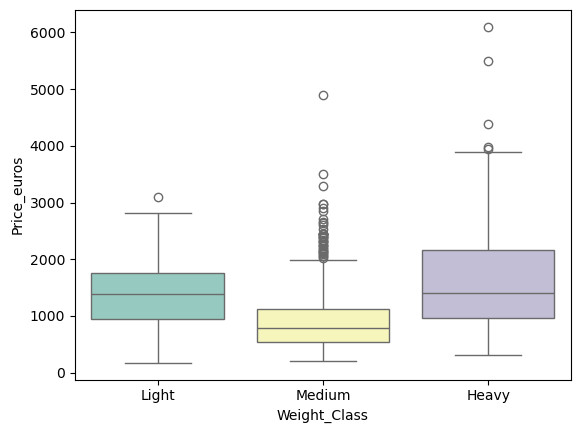

In [176]:
# Box plot:

sns.boxplot(data = df , x = 'Weight_Class' , y='Price_euros' , hue='Weight_Class',  palette ='Set3')

plt.show()


# As there are lot of outliers in the medium_weight_category_price so we will find median price per weight category:

In [178]:
median_price_per_weight_category = df.groupby('Weight_Class',observed=False)['Price_euros'].median().reset_index(name='median price')
median_price_per_weight_category = median_price_per_weight_category.sort_values(by='median price', ascending = False)
median_price_per_weight_category

Weight_Class  median price
2        Heavy   1408.000000
0        Light   1379.000000
1       Medium    788.744995

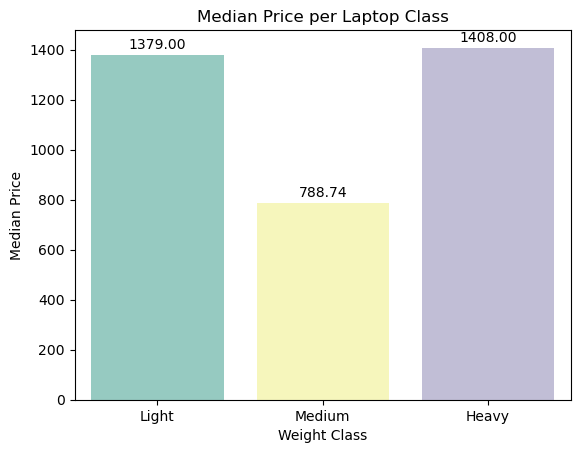

In [180]:
# Visualisation:

ax = sns.barplot(data = median_price_per_weight_category , x = 'Weight_Class' , y='median price' , hue='Weight_Class' , palette='Set3')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

plt.title("Median Price per Laptop Class")
plt.xlabel("Weight Class")
plt.ylabel("Median Price")

plt.show()

In [182]:
# Insight:

# Laptops with the heavy weight has the highest median price ( 1408) followed by the lightweight laptop with price(1379) and then medium weight laptop:

# It show that heavy weight laptops and light weight laptop are costly :

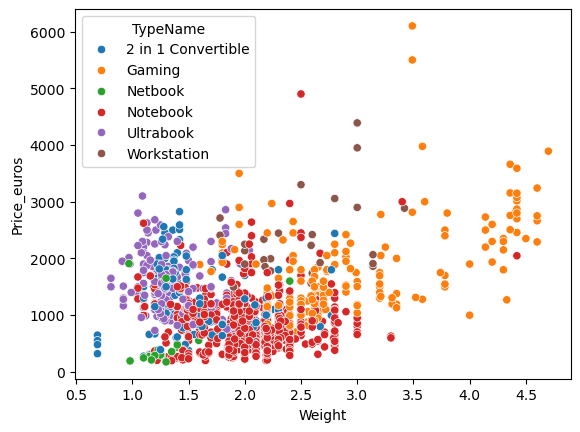

In [185]:
sns.scatterplot(data = df , x='Weight',y='Price_euros',hue = 'TypeName')
plt.show()

## Insight:

Gaming laptops are the most expensive, often exceeding ‚Ç¨2000, some reaching over ‚Ç¨6000.

Notebooks and Workstations have wide price ranges; Workstations are heavier and costlier.

Netbooks and Ultrabooks are lighter and generally priced below ‚Ç¨3000.

2-in-1 Convertibles mostly fall under ‚Ç¨2000.

Heavier devices tend to be more expensive, especially in Gaming and Workstation categories.

Most laptops cluster between 1.0‚Äì2.0 kg and ‚Ç¨500‚Äì‚Ç¨2000.

Netbooks are lightest and cheapest; Gaming laptops show the highest variation in both weight and price.

## 12.Correlation:

In [191]:
df.dtypes

Company                   object
Product                   object
TypeName                category
Inches                   float32
Ram                        int32
OS                      category
Weight                   float32
Price_euros              float32
Screen                    object
ScreenW                    int16
ScreenH                    int16
Touchscreen                 bool
IPSpanel                    bool
RetinaDisplay               bool
CPU_company             category
CPU_freq                 float32
CPU_model                 object
PrimaryStorage             int32
SecondaryStorage           int32
PrimaryStorageType      category
SecondaryStorageType    category
GPU_company             category
GPU_model                 object
Price_Category            object
CPU_freq_range          category
Weight_Class            category
dtype: object

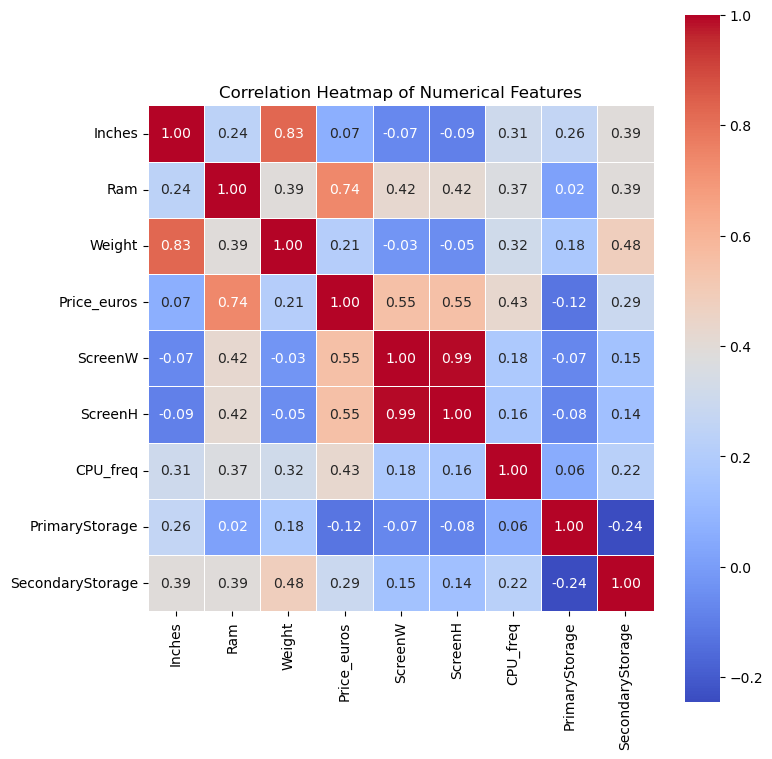

In [193]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


In [194]:
# INSIGHT:

# SO THERE ARE 4 INSIGHTFUL CORRELATION .

# 1. INCHES VS WEIGHT:(0.83)  (STRONG CORRELATION) AS LAPTOP WEIGHT INCREASES SIZE ALSO INCREASES:

# 2. PRICES_EUROS VS RAM :(0.74) (STRONG CORRELATION) AS LAPTOP RAM INCREASES PRICES ALSO INCREASES:

# 3. SCREENW(WIDTH) VS SCREENH(HEIGHT) (0.99) (VERY STRONG CORRELATION) AS LAPTOP SCREENW INCREASES SCREENH ALSO INCREASES:

##  12. OS COUNT:

Operating System

In [200]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class'],
      dtype='object')

In [202]:
df['OS'].value_counts()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

## Insight:

Most Used operating system by companies is Windows 10(1048) followed by No OS and Least operating system used by companies is Android(2)

## 2.Most used by Os by Each Company:

In [207]:
os_count = df.groupby(['Company', 'OS'], observed=False).size().reset_index(name='Count')
os_count_sorted = os_count.sort_values(by=['Company', 'Count'], ascending=[True, False])
most_used_os = os_count_sorted.drop_duplicates(subset='Company', keep='first')
most_used_os


Company            OS  Count
5         Acer    Windows 10     76
17       Apple         macOS     13
23        Asus    Windows 10    133
32       Chuwi    Windows 10      3
41        Dell    Windows 10    249
50     Fujitsu    Windows 10      3
55      Google     Chrome OS      3
68          HP    Windows 10    229
77      Huawei    Windows 10      2
86          LG    Windows 10      3
95      Lenovo    Windows 10    224
104        MSI    Windows 10     54
113   Mediacom    Windows 10      7
123  Microsoft  Windows 10 S      6
131      Razer    Windows 10      7
140    Samsung    Windows 10      7
149    Toshiba    Windows 10     46
158       Vero    Windows 10      4
166     Xiaomi         No OS      3

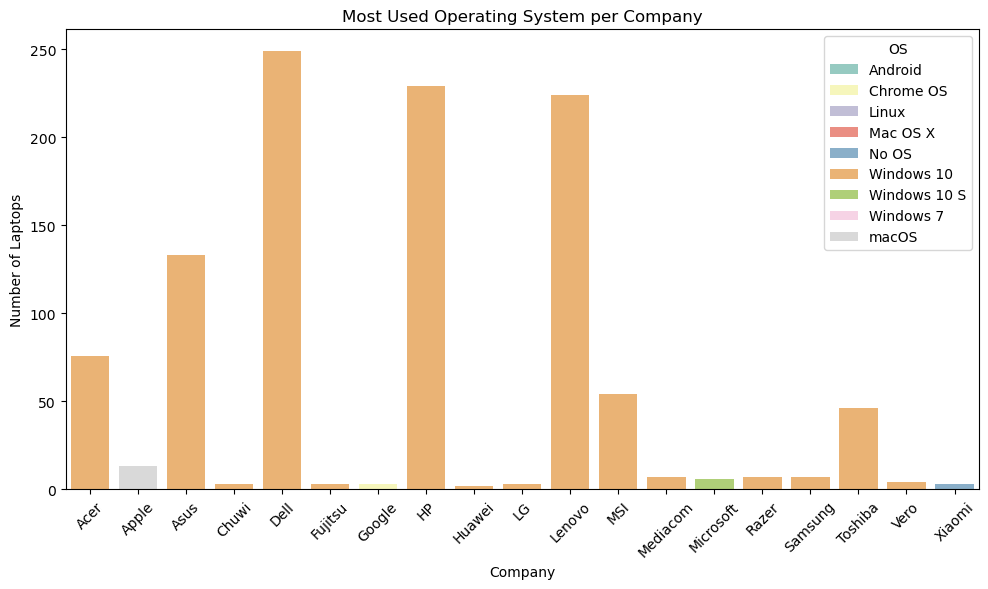

In [209]:
# plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=most_used_os, x='Company', y='Count', hue='OS', palette='Set3')

# Add labels and title
plt.title('Most Used Operating System per Company')
plt.xlabel('Company')
plt.ylabel('Number of Laptops')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [210]:
# INSIGHT:

#  Windows 10 is the most frequently used OS among these maximum comapnies:

# os count = 1048  while other os are not even close to it:

# Reason : Widely Compatible , Default OS , Enterprise-Friendly , User-Friendly Interface, Regular Support & Updates

## 3.Average price of Laptops by Opearting System:

In [215]:
x = df.groupby('OS',observed=True)['Price_euros'].mean().reset_index(name="Average_Price")
result = x.sort_values(by = "Average_Price", ascending = False)
result

OS  Average_Price
8         macOS    1749.630737
7     Windows 7    1686.651367
6  Windows 10 S    1286.479980
3      Mac OS X    1262.871216
5    Windows 10    1180.684082
2         Linux     621.867065
4         No OS     587.973328
1     Chrome OS     553.585205
0       Android     434.000000

## Insight:

Laptop with Os (Macos operating system) has the Highest average price followed by windows7  and windows 10s

and laptops with os(Chrome Os and Android has the least Average Price)

## 13. GPU COMPANY:

In [221]:
df['GPU_company'].value_counts()

GPU_company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

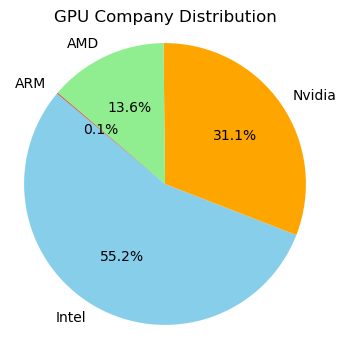

In [223]:
gpu_counts = df['GPU_company'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(gpu_counts, labels=gpu_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen', 'red'])
plt.title('GPU Company Distribution')
plt.axis('equal') 
plt.show()

Intel holds the largest share of the GPU market at 55.2%.

NVIDIA is the second largest, with a 31.1% share.

AMD accounts for 13.6% of the market.

ARM has a very minimal presence, with only 0.1% share.

Overall, Intel clearly dominates the GPU market among the listed companies.

## Average Price by GPU company:

In [228]:
x = df.groupby('GPU_company',observed=True)['Price_euros'].mean().reset_index(name="Avg_Price")
result = x.sort_values(by="Avg_Price", ascending = False)
result


GPU_company    Avg_Price
3      Nvidia  1496.745117
2       Intel  1020.367737
0         AMD   778.026550
1         ARM   659.000000

# 14.Screen

In [233]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class'],
      dtype='object')

In [235]:
df['Screen'].value_counts()

Screen
Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64

## 1.Company with the highest number of laptops for each screen type:

In [239]:
x = df.groupby(['Screen', 'Company']).size().reset_index(name="Screen_Count")
x = x.sort_values(by=["Screen", "Screen_Count"], ascending=[True, False])
result = x.drop_duplicates(subset=['Screen'], keep='first')
result


Screen Company  Screen_Count
1   4K Ultra HD    Dell            20
13      Full HD  Lenovo           194
22     Quad HD+    Dell            14
33     Standard  Lenovo            81

### Insight:

Lenovo shows strong dominance across both Full HD and Standard resolutions, highlighting its broad product portfolio from budget to mid-range.

Dell is focusing more on high-resolution screens like 4K Ultra HD and Quad HD+, indicating a push toward premium and professional markets.




## 2.Average Price of Laptops by Screen Type:

In [244]:
x = df.groupby('Screen')['Price_euros'].mean().reset_index(name="Average_Price")
result = x.sort_values(by="Average_Price" , ascending = False)
result

Screen  Average_Price
0  4K Ultra HD    2424.764160
2     Quad HD+    1616.955078
1      Full HD    1231.204834
3     Standard     730.325134

| Screen Type     |  Average Price (USD) |  Insight                                                                                                                       |
| --------------- | ---------------------- | -------------------------------------------------------------------------------------------------------------------------------- |
| **4K Ultra HD** | \$2,424.76             | The **most expensive** screen type ‚Äî ideal for creators, professionals, and premium users who need top-tier display quality.     |
| **Quad HD+**    | \$1,616.96             | Positioned as a **premium mid-range** option, appealing to users seeking sharp visuals but at a slightly lower cost than 4K.     |
| **Full HD**     | \$1,231.20             | The **mainstream choice**, balancing cost and quality ‚Äî widely adopted across business, student, and mid-range consumer laptops. |
| **Standard**    | \$730.33               | The **least expensive**, indicating use in **budget or entry-level laptops**, often with limited graphics/display performance.   |


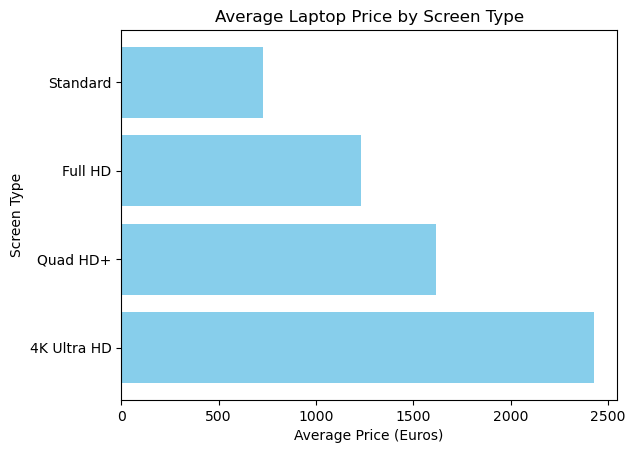

In [247]:
plt.barh(result['Screen'], result['Average_Price'], color='skyblue')
plt.xlabel('Average Price (Euros)')
plt.ylabel('Screen Type')
plt.title('Average Laptop Price by Screen Type')
plt.show()

# 15.ScreenW (Screen Width) in Pixels:

In [252]:
df['ScreenW'].value_counts()

ScreenW
1920    838
1366    290
3840     43
2560     29
3200     25
1600     23
2304      6
2256      6
1440      4
2880      4
2400      4
2160      2
2736      1
Name: count, dtype: int64

## Insight:

Maximum number of Laptops(838) has the ScreenW (1920)

### Average Price of Laptops by ScreenW

In [257]:
x = df.groupby('ScreenW')['Price_euros'].mean().reset_index(name = "Average_Price")
result = x.sort_values(by="Average_Price", ascending = False)
result

ScreenW  Average_Price
10     2880    2493.847412
12     3840    2424.764160
8      2560    2127.605225
5      2256    1612.308228
11     3200    1585.244019
4      2160    1424.000000
7      2400    1423.000000
6      2304    1279.900024
3      1920    1223.961914
1      1440    1038.659912
2      1600     674.214783
0      1366     551.137146
9      2736     449.000000

## Insight:

Laptops with the Screen W (2880) has the highest Average_Price(2493.84)

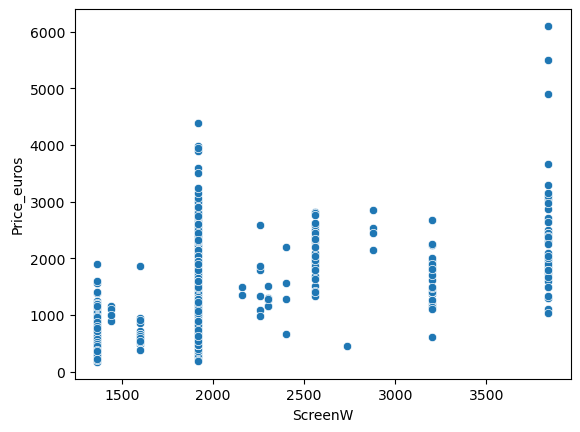

In [261]:
sns.scatterplot(data = df , x='ScreenW' ,y='Price_euros')
plt.show()

## Insight:

The data shows that laptop prices vary a lot based on screen width ‚Äî from just a few hundred euros to over 6,000 euros. 
In general, larger screen widths often cost more, but this isn't always true. Some smaller screens are very expensive, and some larger ones are cheaper.

This means that price doesn‚Äôt depend only on screen size ‚Äî other things like brand, features, and build quality also play a big role. 
Overall, the laptop market is very diverse, with a wide range of prices for all kinds of screen sizes.

# 16.ScreenH:

In [267]:
df['ScreenH'].value_counts()

ScreenH
1080    833
768     290
2160     43
1440     31
1800     29
900      27
1600     10
1504      6
1200      5
1824      1
Name: count, dtype: int64

## Insight:

Maximum number of Laptops(833) has ScreenH(1080)

### Average Price of Laptops by ScreenH

In [272]:
x = df.groupby('ScreenH')['Price_euros'].mean().reset_index(name = "Average_Price")
result = x.sort_values(by="Average_Price", ascending = False)
result

ScreenH  Average_Price
9     2160    2424.764160
4     1440    2004.781006
7     1800    1710.568604
5     1504    1612.308228
6     1600    1577.174072
2     1080    1228.597534
1      900     728.206665
0      768     551.137146
3     1200     451.653992
8     1824     449.000000

## Insight:

Laptops with the ScreenH(2160) has the highest mean_price(2424.76)

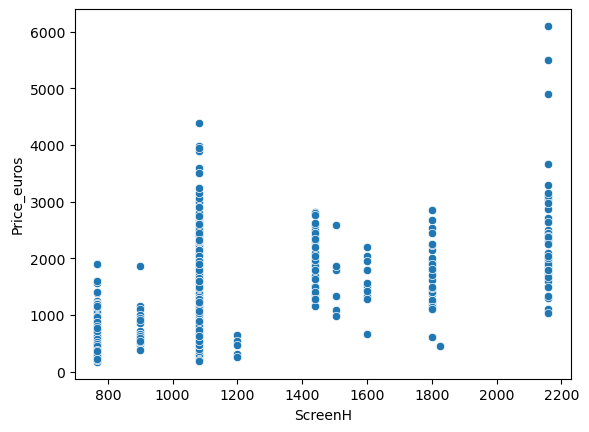

In [276]:
sns.scatterplot(data = df , x='ScreenH' , y='Price_euros')
plt.show()

### Insight:

The scatter plot shows that while laptops with higher screen heights often cost more, the relationship isn't consistent.

Prices vary widely‚Äîeven among laptops with similar screen heights‚Äîindicating that factors like brand, features,

and performance also play a major role. Overall, the market is diverse, and screen height alone doesn't determine price.

# 18 TouchScreen.

In [282]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class'],
      dtype='object')

In [284]:
df['Touchscreen'].value_counts()

Touchscreen
True    1275
Name: count, dtype: int64

## Insight:

All laptops in out dataset are TouchScreen

# 19.IPS panel:

In [290]:
df['IPSpanel'].value_counts()

IPSpanel
True    1275
Name: count, dtype: int64

IPS stands for In-Plane Switching ‚Äî it's a type of LCD display technology used in many laptop screens.

| Feature                          | Description                                                                 |
| -------------------------------- | --------------------------------------------------------------------------- |
| **Wide Viewing Angles**          | Colors and brightness stay consistent even when viewed from the side.       |
| **Better Color Accuracy**        | Displays more accurate and vibrant colors ‚Äî ideal for photo/video editing.  |
| **Good Contrast & Clarity**      | Clearer visuals compared to standard TN (Twisted Nematic) panels.           |
| **Slower Response Time (vs TN)** | Slightly slower for competitive gaming, but greatly improved in modern IPS. |


#### Where It's Used:

Productivity laptops (office, school)

Creative work (graphic design, video editing)

Premium ultrabooks

Some gaming laptops (when paired with high refresh rates)



### Insight:

In our dataset all laptops contains the IPSpanel technology.

# 20 RetinaDisplay

In [299]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class'],
      dtype='object')

In [301]:
df['RetinaDisplay'].value_counts()

RetinaDisplay
True    1275
Name: count, dtype: int64

Retina Display is a marketing term by Apple for screens that have such a high pixel density that the human eye cannot see individual pixels at a normal viewing distance.

| Feature                       | Description                                                       |
| ----------------------------- | ----------------------------------------------------------------- |
| **High Pixel Density**        | Sharp, crisp text and images ‚Äî no visible pixels.                 |
| **Better Color Accuracy**     | Supports wide color gamut (like P3) for vibrant visuals.          |
| **High Brightness**           | Typically brighter than standard screens ‚Äî great for outdoor use. |
| **True Tone (in newer Macs)** | Adjusts color temperature based on ambient light.                 |
| **Energy Efficient**          | Optimized for macOS to balance quality and battery life.          |


## Insight:

In Our Dataset all laptops have the Retina Display.

# 21 CPU_company:

In [309]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class'],
      dtype='object')

In [311]:
df['CPU_company'].value_counts()

CPU_company
Intel      1214
AMD          60
Samsung       1
Name: count, dtype: int64

## Visualisation:

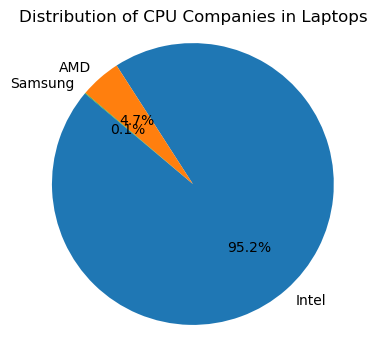

In [314]:
cpu_counts = df['CPU_company'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(cpu_counts, labels=cpu_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of CPU Companies in Laptops')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

## Insight:

Intel dominates the market, accounting for 95.2% of laptops with CPU companies.

AMD has a small presence, making up 4.7% of the market.
    
Samsung has a minimal share, representing only 0.1%.

## 2.Average price of Laptops by Cpu company:

In [319]:
x = df.groupby('CPU_company',observed=True)['Price_euros'].mean().reset_index(name="Average_Price")
result = x.sort_values(by="CPU_company")
result

CPU_company  Average_Price
0         AMD     560.993835
1       Intel    1163.728882
2     Samsung     659.000000

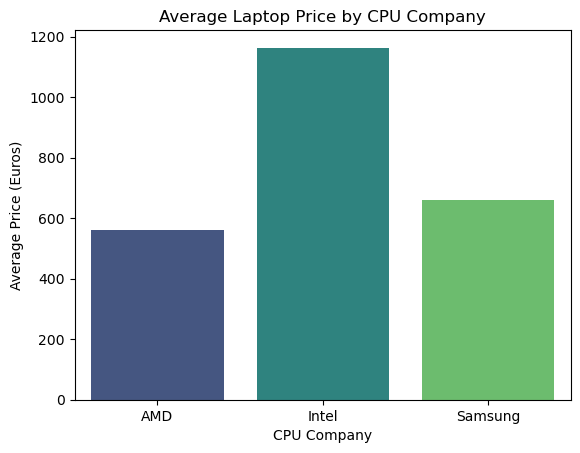

In [321]:
x = df.groupby('CPU_company', observed=True)['Price_euros'].mean().reset_index(name="Average_Price")
result = x.sort_values(by="CPU_company")

sns.barplot(data=result, x='CPU_company', y='Average_Price', palette='viridis',hue='CPU_company')
plt.xlabel('CPU Company')
plt.ylabel('Average Price (Euros)')
plt.title('Average Laptop Price by CPU Company')
plt.show()


## Insight:

Intel-based laptops have the highest average price (‚Ç¨1163.73), indicating their dominance in mid-to-high-end and performance-focused devices.

Samsung CPU laptops are moderately priced (‚Ç¨659), likely used  compact devices.

AMD-based laptops have the lowest average price (‚Ç¨560.99), reflecting their popularity in budget-friendly and value-for-money segments.



# CPU_model:

## Most frequent used CPU_model by Laptop company:

In [328]:
df['CPU_model'].value_counts().head()

CPU_model
Core i5 7200U     193
Core i7 7700HQ    147
Core i7 7500U     133
Core i3 6006U      81
Core i7 8550U      73
Name: count, dtype: int64

## Insight:

| CPU Model          | üíª Count | üîç Insight                                                                                                                                                       |
| ------------------ | -------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Core i5 7200U**  | 193      | The most commonly used CPU in the dataset ‚Äî a popular **mid-range processor**, well-balanced for general use like office work, browsing, and light multitasking. |
| **Core i7 7700HQ** | 147      | A **high-performance quad-core CPU**, often found in **gaming and heavy-duty laptops**, showing strong presence in the upper segment.                            |
| **Core i7 7500U**  | 133      | A **power-efficient i7 processor**, common in **ultrabooks and premium thin laptops**, offering good performance with lower power usage.                         |
| **Core i3 6006U**  | 81       | A basic **entry-level processor**, indicating presence in **budget and student-friendly laptops**.                                                               |
| **Core i7 8550U**  | 73       | A newer **8th-gen quad-core i7**, showing up in **modern ultrabooks**, reflecting the market shift toward better multi-core performance in slim devices.         |


# 22 Primary Storage:

In [335]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class'],
      dtype='object')

In [337]:
df['PrimaryStorage'].value_counts()

PrimaryStorage
256     508
1024    240
128     175
512     136
500     124
32       43
2048     16
64       15
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

## Insight:

Most common Primary storage in Laptops is 256 gb (508 Laptops)  followed by 1024 gb(240 laptops) , 128 gb (175 laptops).

The least common primary storage are ( 16gb , 180gb , 240gb , 8gb , 508gb)

###  Primary Storage vs Average Price:

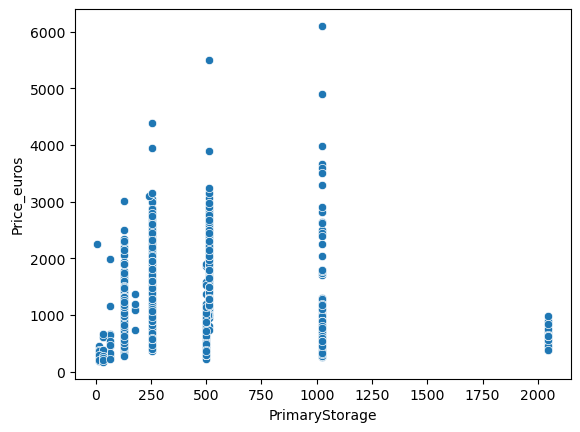

In [342]:
sns.scatterplot(data = df , x = 'PrimaryStorage', y='Price_euros')
plt.show()

## Insight:

The scatter plot shows that laptops with smaller storage (‚â§500 GB) span a wide price range, from budget to high-end. As storage increases,
laptops become less common, 

especially above 1000 GB, often appearing in premium models.

While higher storage can increase price, it's not the only factor ‚Äî many laptops with similar storage have very different prices, 

suggesting that brand, performance, and features also heavily influence cost.


## 23 SecondaryStorage

In [348]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class'],
      dtype='object')

In [350]:
df['SecondaryStorage'].value_counts()

SecondaryStorage
0       1067
1024     187
2048      15
256        3
500        2
512        1
Name: count, dtype: int64

## Insight:

Most of the Laptops (1067) donot have secondaryStorage while 187 laptops have 1024gb secondarystorage ,15 laptops have 2048 secondarystorage.

The least common secondary storage are 256gb(3 laptop), 500gb(2 laptop) , 512gb( 1 laptop).

### SecondaryStorage vs Price_euros:

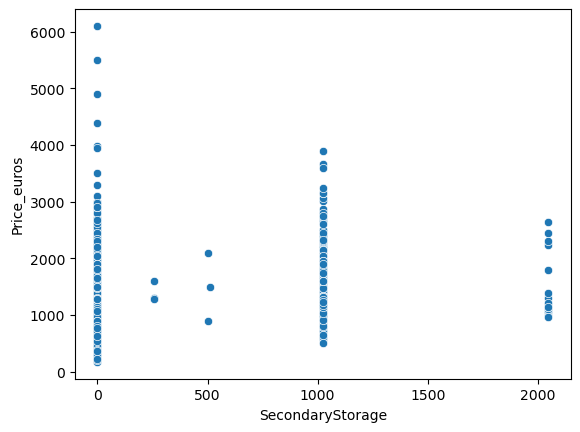

In [355]:
sns.scatterplot(data = df , x = 'SecondaryStorage', y='Price_euros')
plt.show()

### Insight:

The scatter plot shows that secondary storage capacity has little direct impact on laptop prices.

Laptops with low or mid-range storage (0‚Äì1000 GB) span a wide price range, and even high-capacity models aren‚Äôt always the most expensive. 
    
This suggests that other features like CPU, GPU, and brand play a bigger role in determining price.

Storage is important, but not the main driver of laptop cost.

# Creating a Column Total Storage:

In [360]:
df['Total_Storage'] = df['PrimaryStorage'] + df['SecondaryStorage']

In [362]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class', 'Total_Storage'],
      dtype='object')

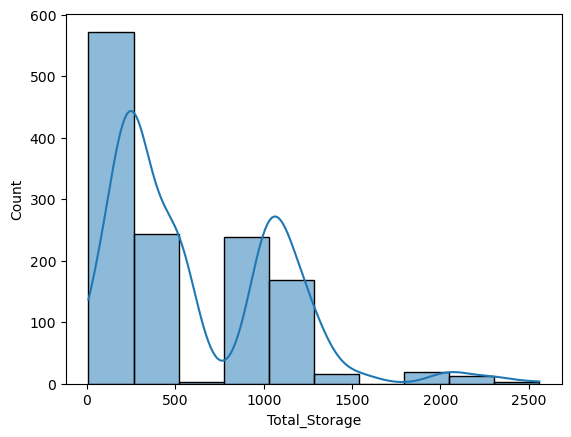

In [365]:
sns.histplot(df['Total_Storage'], bins=10, kde=True)
plt.show()

## Insight:

The histogram shows that most laptops have low total storage, typically below 500 GB. 

The data is right-skewed, with a sharp peak at smaller capacities and a long tail extending toward higher storage sizes (up to 2500 GB),

which are less common. This suggests that larger storage options are rarer, likely due to higher cost or limited demand.

In [369]:
df['Total_Storage'].value_counts()

Total_Storage
256     420
1024    238
500     124
512     118
1152     94
128      79
1280     74
32       43
2048     19
1536     15
64       14
2304     10
16       10
180       5
2560      3
756       2
2176      2
768       1
1088      1
240       1
8         1
508       1
Name: count, dtype: int64

## Insight:

Most common totalstorage is 256 gb(420 laptops) followed by 1024gb (238 laptops) , 500 gb(124 laptops)

The least common total storage are (768 , 1088 , 240 ,8 ,508) gb

## TotalStorage vs Laptop Price:

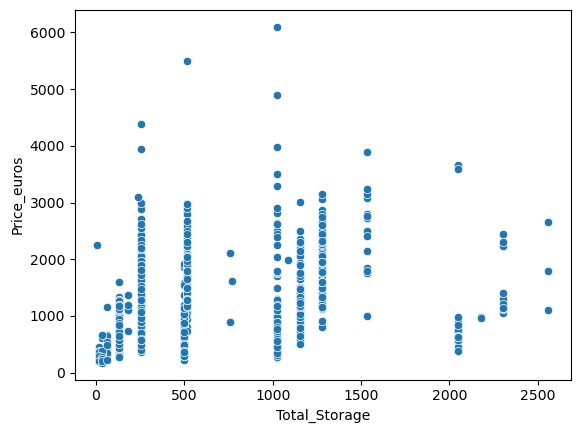

In [374]:
sns.scatterplot(data = df , x = 'Total_Storage' , y='Price_euros')
plt.show()

## Insight :

The scatter plot shows that laptops with low storage (‚â§500‚ÄØGB) have high price variation, including budget and premium models.

While larger storage (1000‚ÄØGB+) sometimes aligns with higher prices, 
                
there's no strong correlation ‚Äî many laptops with similar storage differ greatly in cost.
                      
This highlights a diverse market, where storage is not only one of many factors influencing laptop price.

# 24 PrimaryStorageType

In [380]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class', 'Total_Storage'],
      dtype='object')

In [382]:
df['PrimaryStorageType'].value_counts()

PrimaryStorageType
SSD              837
HDD              359
Flash Storage     71
Hybrid             8
Name: count, dtype: int64

### Insight:

1.SSD is the dominant storage type, found in 837 laptops, highlighting its popularity due to speed and efficiency.

2.HDDs are still fairly common with 359 units, likely due to their larger storage capacity at lower cost.

3.Flash Storage appears in 71 laptops, typically in lightweight or budget models.

4.Hybrid storage is the least common, with only 8 laptops, indicating minimal use of combined SSD + HDD setups.

## Average Price of Laptops by PrimaryStorageType

In [387]:
x = df.groupby("PrimaryStorageType", observed=False)["Price_euros"].mean().reset_index(name="Average_Price")
result = x.sort_values(by="Average_Price", ascending = False)
result

PrimaryStorageType  Average_Price
3                SSD    1391.896484
2             Hybrid     875.934998
1                HDD     658.401245
0      Flash Storage     544.994690

## Insight: Average Laptop Price by Primary Storage Type

1.SSDs are associated with the highest average price (‚Ç¨1391.90), reflecting their performance advantages and common use in premium models.

2.Hybrid storage has a moderate average price (‚Ç¨875.93), indicating a balance of speed and capacity.

3.HDD-based laptops average at ‚Ç¨658.40, often found in budget or older systems.

4.Flash Storage laptops have the lowest average price (‚Ç¨544.99), suggesting use in low-cost, ultra-portable devices.

# 25  SecondaryStorageType:

In [393]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class', 'Total_Storage'],
      dtype='object')

In [395]:
df['SecondaryStorageType'].value_counts()

SecondaryStorageType
No        1067
HDD        202
SSD          4
Hybrid       2
Name: count, dtype: int64

## Insight:

1 A majority of laptops (1067) have no secondary storage, highlighting a market trend toward single-storage configurations (usually SSD-only).

2.HDDs are the most common form of secondary storage (202 laptops), likely added for extra capacity alongside a primary SSD.

3.Very few laptops have secondary SSDs (4) or Hybrid drives (2), indicating that these configurations are rare and likely limited to high-end or niche use cases.

# 26 GPU_company:

In [401]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class', 'Total_Storage'],
      dtype='object')

In [403]:
df['GPU_company'].value_counts()

GPU_company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

### Visualisation:

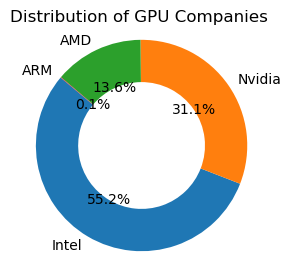

In [406]:
gpu_counts = df['GPU_company'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(gpu_counts, labels=gpu_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Distribution of GPU Companies ')
plt.axis('equal')  
plt.show()


### Insight:

1.Intel holds the largest share at 55.2%, indicating a dominant position in the GPU market.
    
2.Nvidia is the second-largest with 31.1%, closely trailing Intel, highlighting strong competition.
    
3.AMD and ARM have significantly smaller shares, at 13.6% and 0.1% respectively, suggesting a much smaller presence in the GPU market.

### Average Price by Gpu company:

In [411]:
x = df.groupby('GPU_company',observed=False)['Price_euros'].mean().reset_index(name="Average_Price")
result = x.sort_values(by="Average_Price",ascending = False)
result

GPU_company  Average_Price
3      Nvidia    1496.745117
2       Intel    1020.367737
0         AMD     778.026550
1         ARM     659.000000

## Insight;

1.Nvidia-powered laptops have the highest average price (~‚Ç¨1497), indicating their presence in high-performance or gaming laptops.

2.Intel GPUs follow with an average of ~‚Ç¨1020, often found in mid-range laptops.

3.AMD laptops average ~‚Ç¨778, showing a balance of performance and affordability.

4.ARM-based GPUs have the lowest average price (~‚Ç¨659), typically used in entry-level or lightweight devices.

# 27 GPU_model:

### Top 5 Most Frequent GPU_model used by the company:

In [418]:
df['GPU_model'].value_counts().head()

GPU_model
HD Graphics 620     280
HD Graphics 520     181
UHD Graphics 620     68
GeForce GTX 1050     66
GeForce GTX 1060     48
Name: count, dtype: int64

### Insight:

1.Intel HD Graphics 620 is the most common GPU in the dataset (280 laptops), followed by HD Graphics 520 (181 laptops). These are integrated GPUs, commonly found in budget and productivity laptops.

2.UHD Graphics 620 (68 laptops) also indicates a preference for Intel's integrated solutions in newer models.

3.Nvidia GeForce GTX 1050 (66 laptops) and GTX 1060 (48 laptops) are the most popular dedicated GPUs, typically seen in gaming or high-performance laptops.

# 28 Ram:

In [425]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class', 'Total_Storage'],
      dtype='object')

In [427]:
df['Ram'].value_counts()

Ram
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64

## Insight:

Most Common RAM Sizes:

8 GB is the most common configuration, found in 613 laptops, indicating it is the standard choice for general users.

4 GB is the second most frequent (367 laptops), often seen in budget or entry-level models.

Higher RAM Sizes:

16 GB RAM is found in 198 laptops, showing its popularity among power users and professionals.

32 GB, 64 GB, and 24 GB configurations are rare, collectively appearing in only 21 laptops, suggesting limited availability of high-performance machines.

Low RAM Configurations:

2 GB RAM is present in 16 laptops, likely representing older or very low-end devices.

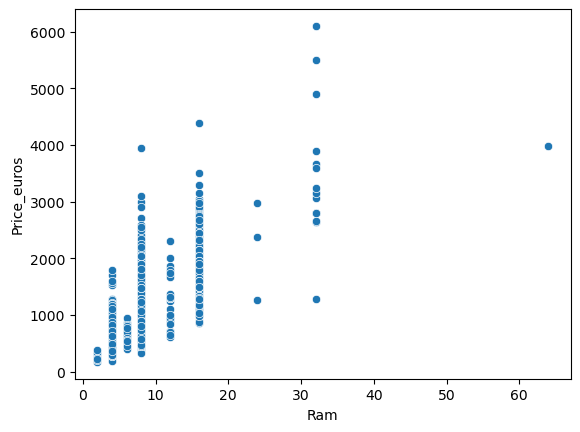

In [431]:
sns.scatterplot(data = df , x='Ram' , y='Price_euros')
plt.show()

## Insight:

1.Higher RAM = Higher Price: Devices with more RAM generally cost more, though the trend isn't perfectly linear.

2.Common Range: Most laptops with 8‚Äì16 GB RAM fall between ‚Ç¨500‚Äì‚Ç¨3000.

3.Low RAM, Mixed Prices: Devices with 4‚Äì8 GB RAM show a wide price range, influenced by brand and specs.

3 Premium Segment: 32 GB RAM laptops show a clear spike in price (up to ‚Ç¨6000), highlighting high-end models.

### Average Price by Ram Size:

In [436]:
x = df.groupby('Ram')['Price_euros'].mean().reset_index(name = "Average_Price")
result = x.sort_values(by="Average_Price", ascending = False)
result

Ram  Average_Price
8   64    3975.000000
7   32    3413.085938
6   24    2206.333252
5   16    1941.192993
4   12    1239.438477
3    8    1184.429443
2    6     619.356567
1    4     576.109131
0    2     247.634369

## Insight:

Gnerally laptops with the higher rams have the  high prices

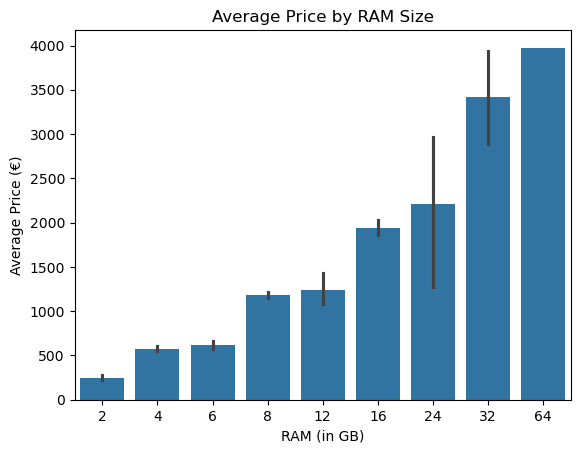

In [439]:
sns.barplot(x='Ram', y='Price_euros', data=df)
plt.title('Average Price by RAM Size')
plt.xlabel('RAM (in GB)')
plt.ylabel('Average Price (‚Ç¨)')
plt.show()


## Laptop with the highest ram:

In [443]:
max_ram = df['Ram'].max()

x = df[df['Ram'] == max_ram]

x


Company     Product TypeName     Inches  Ram          OS  Weight  \
1066    Asus  ROG G701VO   Gaming  17.299999   64  Windows 10    3.58   

      Price_euros   Screen  ScreenW  ...  PrimaryStorage  SecondaryStorage  \
1066       3975.0  Full HD     1920  ...            1024                 0   

      PrimaryStorageType  SecondaryStorageType GPU_company        GPU_model  \
1066                 SSD                    No      Nvidia  GeForce GTX 980   

     Price_Category  CPU_freq_range  Weight_Class Total_Storage  
1066           High         2‚Äì3 GHz         Heavy          1024  

[1 rows x 27 columns]

## laptop With the highest ram and Highest price

In [447]:
max_ram = df['Ram'].max()
max_price = df['Price_euros'].max()
result = df[(df['Ram'] == max_ram) | (df['Price_euros'] == max_price)]
result


Company     Product TypeName     Inches  Ram          OS  Weight  \
196    Razer   Blade Pro   Gaming  17.299999   32  Windows 10    3.49   
1066    Asus  ROG G701VO   Gaming  17.299999   64  Windows 10    3.58   

      Price_euros       Screen  ScreenW  ...  PrimaryStorage  \
196        6099.0  4K Ultra HD     3840  ...            1024   
1066       3975.0      Full HD     1920  ...            1024   

      SecondaryStorage  PrimaryStorageType  SecondaryStorageType GPU_company  \
196                  0                 SSD                    No      Nvidia   
1066                 0                 SSD                    No      Nvidia   

             GPU_model Price_Category  CPU_freq_range  Weight_Class  \
196   GeForce GTX 1080           High         2‚Äì3 GHz         Heavy   
1066   GeForce GTX 980           High         2‚Äì3 GHz         Heavy   

     Total_Storage  
196           1024  
1066          1024  

[2 rows x 27 columns]

-- Insight:

Laptop with high ram(32 gb) and high_price(6099) is razer(blade pro) .

# --  Creating Machine Learning Model to Predict the Laptop Price-- :

In [453]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class', 'Total_Storage'],
      dtype='object')

## 1.Importing necessary Prequisite:

In [645]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error


## 2.Defining Features for target

In [468]:
features = ['Ram', 'CPU_company', 'CPU_freq_range', 'OS',
            'Total_Storage', 'GPU_company', 'Screen']
target = 'Price_euros'

X = df[features]
y = df[target]

categorical_features = ['CPU_company', 'CPU_freq_range', 'OS', 'GPU_company', 'Screen']
numerical_features = ['Ram', 'Total_Storage']

## 3. Preperocessing Pipelines

In [474]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

## 4.Random forest Pipelines

In [481]:
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

## 5. Training and testing data splitting

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.Training the model:

In [490]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Total_Storage']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CPU_company',
                                                   'CPU_freq_range', 'OS',
                                                   'GPU_company',
                                                   'Screen'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

## 7. Predicting and Evaluating the data

In [493]:
y_pred = model_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Random Forest Regression Model Evaluation:")
print(f"R¬≤ Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Random Forest Regression Model Evaluation:
R¬≤ Score: 0.7038
RMSE: 383.44
MAE: 253.66


C:\Users\lordo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| **Metric**   | **Value**   | **Interpretation**                                                                                                            |
| ------------ | ----------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **R¬≤ Score** | **0.7038**  | The model explains **70.38%** of the variability in laptop prices. This indicates a **strong overall fit**.                   |
| **RMSE**     | **‚Ç¨383.44** | On average, the model‚Äôs predictions are off by **‚Ç¨383**, with larger errors penalized more. Lower is better.                  |
| **MAE**      | **‚Ç¨253.66** | The average absolute error in price prediction is **‚Ç¨254**. This gives a **straightforward estimate** of prediction accuracy. |


## Visualisation

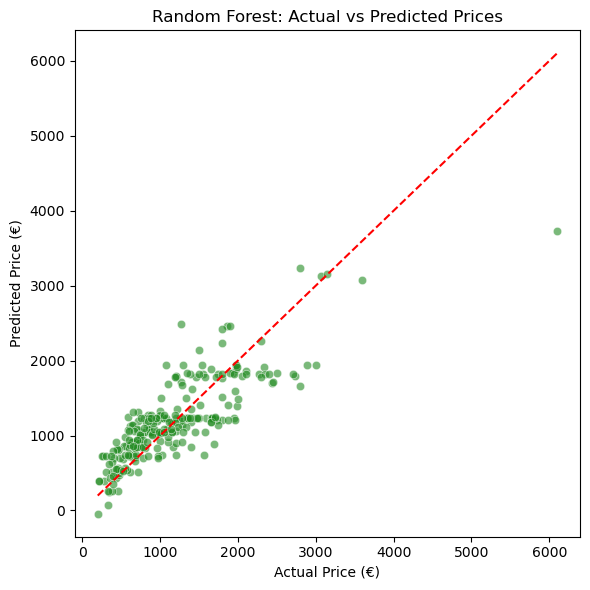

In [459]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='forestgreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price (‚Ç¨)')
plt.ylabel('Predicted Price (‚Ç¨)')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.tight_layout()
plt.show()


In [497]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Price_Category',
       'CPU_freq_range', 'Weight_Class', 'Total_Storage'],
      dtype='object')